In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})

In [2]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
df_scaled[col_names] = scaler.fit_transform(features.values)

In [5]:
df_scaled[col_names]

,Income,Age
0,0.111675,0.212121
1,0.000000,0.000000
2,1.000000,0.727273
3,0.069374,1.000000


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,5.558376,6.060606,HR
1,5.000000,5.000000,Legal
2,10.000000,8.636364,Marketing
3,5.346870,10.000000,Management


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,-0.449056,-0.685248,HR
1,-0.722214,-1.218219,Legal
2,1.723796,0.609110,Marketing
3,-0.552525,1.294358,Management


In [8]:
df_scaled.describe()

,Income,Age
count,4.000000,4.000000e+00
mean,0.000000,-5.551115e-17
std,1.154701,1.154701e+00
min,-0.722214,-1.218219e+00
25%,-0.594947,-8.184910e-01
50%,-0.500791,-3.806935e-02
75%,0.094157,7.804217e-01
max,1.723796,1.294358e+00


In [9]:
df["Balance"] = [100.0, -263.0, 2000.0, -5.0]
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125000,0.490196,HR
1,0.015000,0.352941,Legal
2,1.000000,0.823529,Marketing
3,0.083333,1.000000,Management


In [10]:
df["Income"].max(), df["Age"].max(), df['Balance'].max()

(120000, 51, 2000.0)

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.075075,-0.404762,HR
1,-0.321321,-0.738095,Legal
2,3.228228,0.404762,Marketing
3,-0.075075,0.833333,Management


In [13]:
df['log_income'] = np.log(df['Income'])
# We created a new column to store the log values

df

,Income,Age,Department,Balance,log_income
0,15000,25,HR,100.0,9.615805
1,1800,18,Legal,-263.0,7.495542
2,120000,42,Marketing,2000.0,11.695247
3,10000,51,Management,-5.0,9.210340


<AxesSubplot:ylabel='Frequency'>

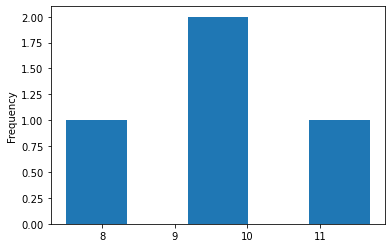

In [14]:
df['log_income'].plot.hist(bins = 5)

In [15]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125158,-0.597385,HR
1,-1.395497,-1.301984,Legal
2,1.419403,0.681202,Marketing
3,-0.149064,1.218168,Management


In [16]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


### Feature Scaling Implementation on Big Mart Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

In [23]:
data = pd.read_csv("data.csv")
print("Big Mart Data")
data.head()

Big Mart Data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
X = data[['Item_Weight', 'Item_MRP']]
y = data['Item_Outlet_Sales']

In [26]:
X.head()

,Item_Weight,Item_MRP
0,9.30,249.8092
1,5.92,48.2692
2,17.50,141.6180
3,19.20,182.0950
4,8.93,53.8614


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=27)

In [29]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

In [35]:
# transform training data
X_train_norm = norm.transform(X_train)
print("Scaled Train Data: \n")
X_train_norm

Scaled Train Data: 



array([[0.47305746, 0.31285866],
       [0.17356356, 0.77688049],
       [0.55343852, 0.47209743],
       ...,
       [0.49389699, 0.94913208],
       [       nan, 0.74522493],
       [       nan, 0.01696701]])

In [34]:
# transform testing data
X_test_norm = norm.transform(X_test)
print("Scaled Test Data: \n")
print(X_test_norm)

Scaled Test Data: 

[[0.47901161 0.76219193]
 [0.47901161 0.60138948]
 [       nan 0.67513362]
 ...
 [0.38374516 0.3730314 ]
 [0.22119678 0.50756202]
 [0.93450432 0.91705207]]


In [48]:
x_norm = pd.DataFrame(data=X_test_norm, 
                      columns=['Item_Weight','Item_MRP'])
x_norm.head()

,Item_Weight,Item_MRP
0,0.479012,0.762192
1,0.479012,0.601389
2,NaN,0.675134
3,0.761834,0.301410
4,0.401608,0.907993


In [36]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [37]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [41]:
# numerical features
num_cols = ['Item_Weight','Item_MRP']

In [42]:
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [50]:
X_train_stand.head()

,Item_Weight,Item_MRP
5375,-0.071070,-0.571801
379,-1.151801,1.189694
5834,0.218987,0.032693
3188,-0.221470,-1.055149
5434,0.509044,1.861778


Text(0.5, 1.0, 'Original Data')

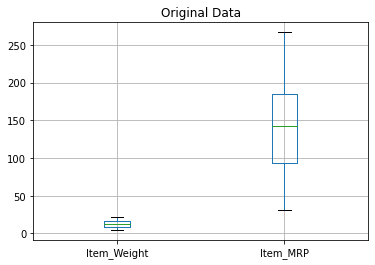

In [52]:
data[['Item_Weight','Item_MRP']].boxplot()
plt.title("Original Data")

Text(0.5, 1.0, 'Normalized Data')

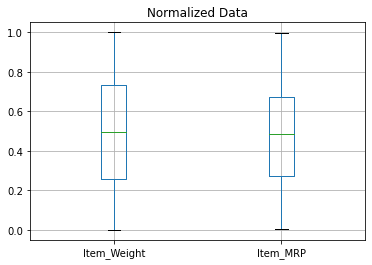

In [53]:
x_norm.boxplot()
plt.title("Normalized Data")

Text(0.5, 1.0, 'Standardized Data')

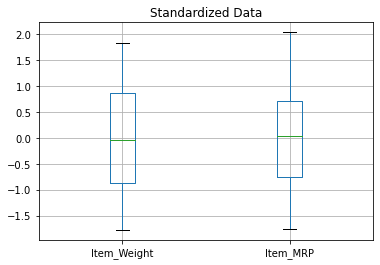

In [54]:
X_train_stand.boxplot()
plt.title("Standardized Data")

### Filter based feature selection techniques

#### Feature Selection Filter Based Techniques

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [5]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


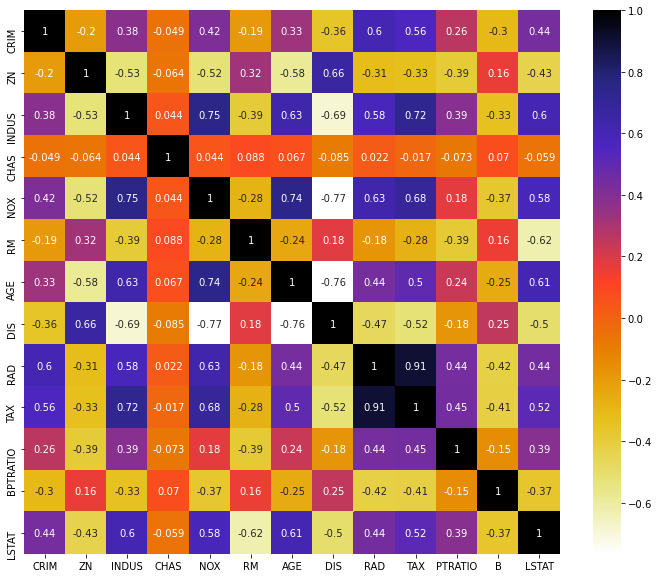

In [7]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [10]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [11]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


### Feature Selection - Information gain

In [2]:
import pandas as pd

df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [6]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [7]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41936486, 0.30769814, 0.16736793, 0.23470679, 0.19358612,
       0.47221619, 0.71409185, 0.09395653, 0.25463082, 0.61150272,
       0.55773447, 0.54943345, 0.55077612])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714092
Color.int               0.611503
Hue                     0.557734
Proline                 0.550776
OD                      0.549433
Phenols                 0.472216
Alcohol                 0.419365
Malic.acid              0.307698
Proanth                 0.254631
Acl                     0.234707
Mg                      0.193586
Ash                     0.167368
Nonflavanoid.phenols    0.093957
dtype: float64

<AxesSubplot:>

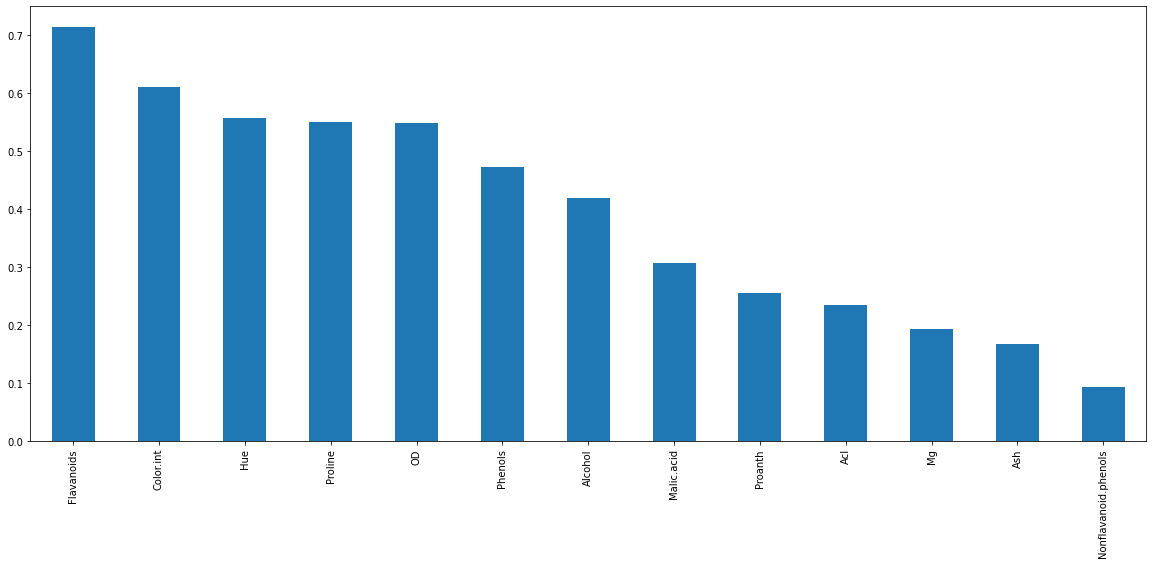

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
from sklearn.feature_selection import SelectKBest

In [11]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

### Feature selection using chi-square test

In [20]:
import seaborn as sns
df=sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [22]:
import numpy as np

#label encoding for sex
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

#label encoding for embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

#label encoding for alone
df['alone']=np.where(df['alone']==True,1,0)

df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [25]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [26]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [27]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [28]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [29]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [30]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

### Wrapper based feature selection

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension

(506, 13)


In [34]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Forward Selection

In [36]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [51]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [52]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

### Backward Elimination

In [53]:
#Sequential backward elimination(sbe)
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)

In [54]:
sbs.fit(X, y)
sbs.k_feature_names_

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

In [55]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(3, 11))

C:\Users\Bhara\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Bhara\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


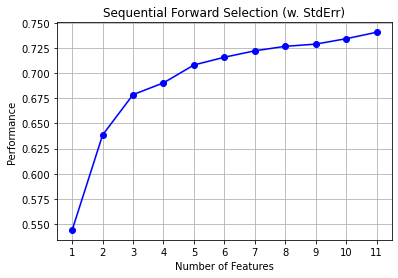

In [56]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### Recursive Feature Elimination

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=11)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)

In [61]:
_ = rfe.fit(X_train, y_train)

In [64]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [63]:
rfe.support_

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [62]:
X_train.loc[:, rfe.support_]

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
487,4.83567,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45
284,0.00906,2.97,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
360,4.54192,18.10,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79
419,11.81230,18.10,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74
93,0.02875,15.04,0.464,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21
...,...,...,...,...,...,...,...,...,...,...,...
107,0.13117,8.56,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
76,0.10153,12.83,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
395,8.71675,18.10,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
418,73.53410,18.10,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62


In [65]:
forest = RandomForestRegressor()
_ = forest.fit(rfe.transform(X_train), y_train)
forest.score(rfe.transform(X_test), y_test)

0.8675070111305287

### Embedding Techniques

In [92]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [94]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [69]:
#imputing the missing values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [70]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [71]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

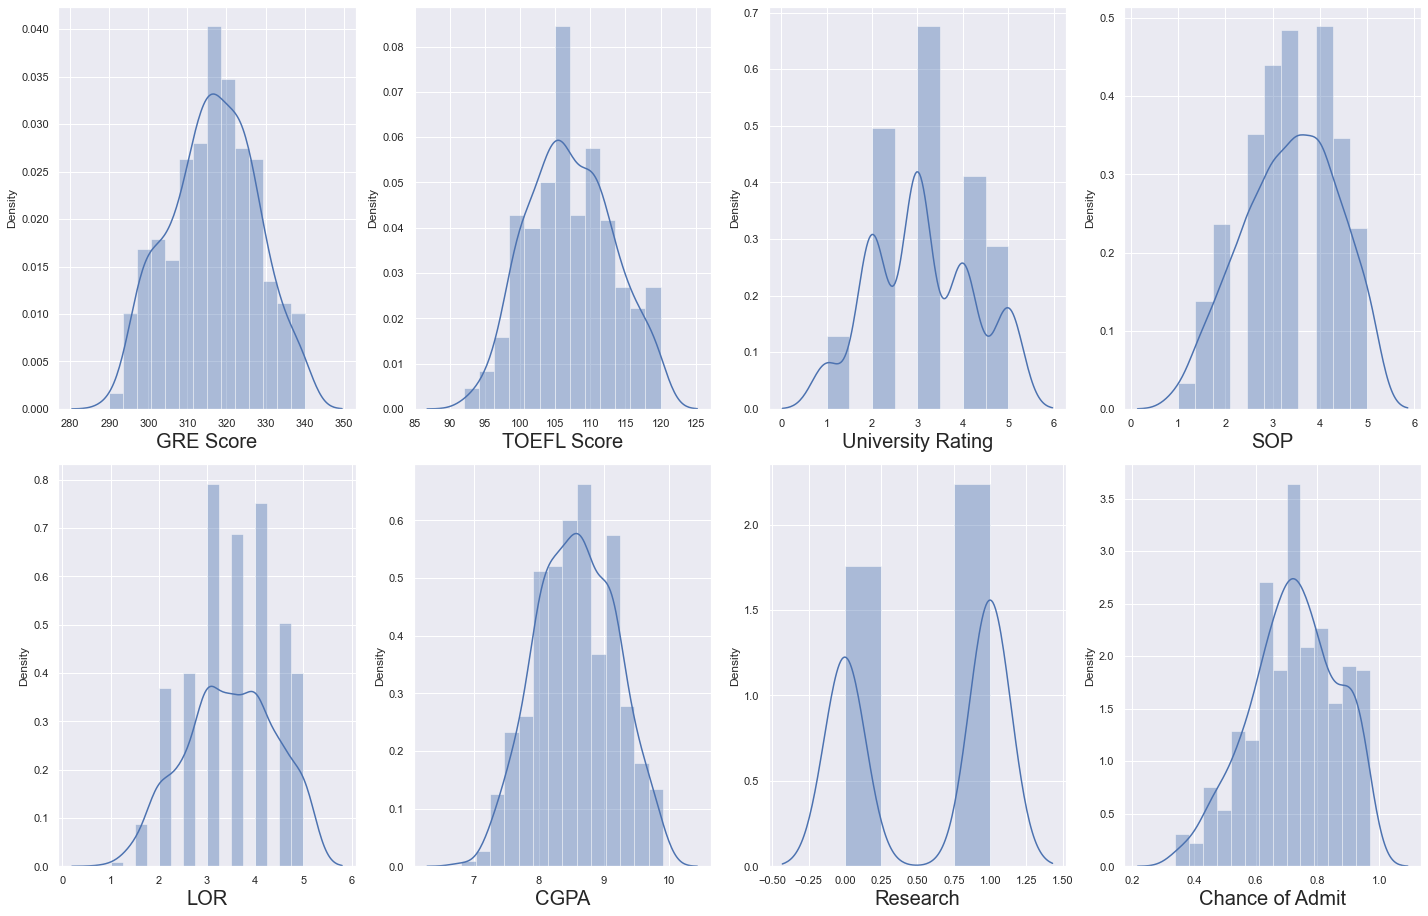

In [72]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [73]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

In [74]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [76]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [78]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [79]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [80]:
regression.score(x_train,y_train)

0.8415250484247909

In [96]:
regression.score(x_test,y_test)

0.7534898831471064

In [81]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [82]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [83]:
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [84]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [85]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [86]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.71256372, 8.17676403, 1.916708  , 2.35983933, 8.69692737,
       6.29062357, 4.83174053, 2.52232862, 2.47485804, 8.15154505,
       9.93407039, 0.12995382, 6.8199434 , 1.47790479, 2.13117464,
       6.53544502, 5.39448309, 8.07964957, 4.11567704, 8.65543117,
       7.52072832, 2.80010721, 3.53828597, 7.16988581, 8.33271128,
       2.01185303, 0.79548931, 8.05865208, 3.95680905, 3.43417446,
       0.93644849, 3.42934827, 6.58985127, 1.42047932, 8.12816516,
       9.89220411, 7.41923507, 6.69671349, 5.31239814, 8.49939129,
       2.6520373 , 6.3768584 , 2.45911273, 4.34914908, 9.27319241,
       1.41723926, 1.36690832, 3.18929206, 2.71742897, 0.637313  ]),
        cv=10, normalize=True)

In [87]:
ridgecv.alpha_

0.12995381505915837

In [88]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.12995381505915837)

In [89]:
ridge_model.score(x_test, y_test)

0.7535534892929413

### Python Implementation

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
data = pd.read_csv('glass.data')

In [99]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [100]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [101]:
data=data.drop(labels=['index','Class'], axis=1)

In [102]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [104]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [105]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


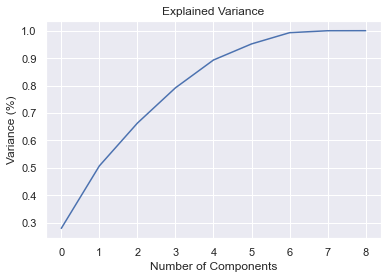

In [106]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [107]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4'])

In [108]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102
